In [1]:
!pip install kagglehub

import kagglehub


path = kagglehub.dataset_download("marusagar/hand-gesture-detection-system")

print("Dataset downloaded to:", path)


Dataset downloaded to: /kaggle/input/hand-gesture-detection-system


Thumbs Up: 123 folders
Left Swipe: 136 folders
Right Swipe: 137 folders
Stop Gesture: 130 folders
Thumbs Down: 137 folders


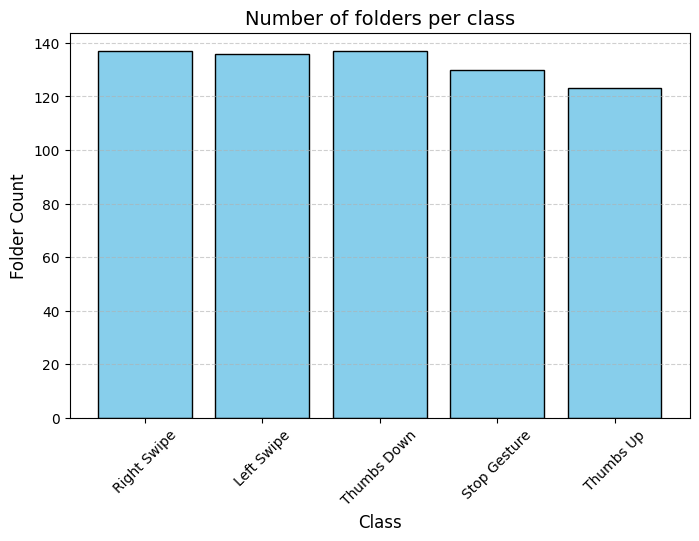

In [2]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

train=path+"/train/train"
val=path+"/val/val"

# تعریف الگوها برای هر کلاس اصلی
class_patterns = {
    "Thumbs Up": [
        "Thumbs Up_new",
        "Thumbs_Up_new"
    ],
    "Left Swipe": [
        "Left Swipe_new_Left Swipe_new",
        "Left_Swipe_new"
    ],
    "Right Swipe": [
        "Right Swipe_new",
        "Right_Swipe_new"
    ],
    "Stop Gesture": [
        "Stop_new",
        "Stop Gesture_new"
    ],
    "Thumbs Down": [
        "Thumbs Down_new",
        "Thumbs_Down_new"
    ]
}

# شمارش
class_counts = defaultdict(int)

for folder in os.listdir(train):
    folder_path = os.path.join(train, folder)
    if os.path.isdir(folder_path):
        for main_class, patterns in class_patterns.items():
            if any(pat in folder for pat in patterns):
                class_counts[main_class] += 1
                break  # از حلقه خارج شو وقتی کلاس پیدا شد

# نمایش
for cls in class_patterns.keys():
    print(f"{cls}: {class_counts[cls]} folders")
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
plt.title("Number of folders per class", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Folder Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


🖼 تعداد فریم‌های هر کلاس:
Thumbs Up: 3690 frames
Left Swipe: 4080 frames
Right Swipe: 4110 frames
Stop Gesture: 3900 frames
Thumbs Down: 4110 frames


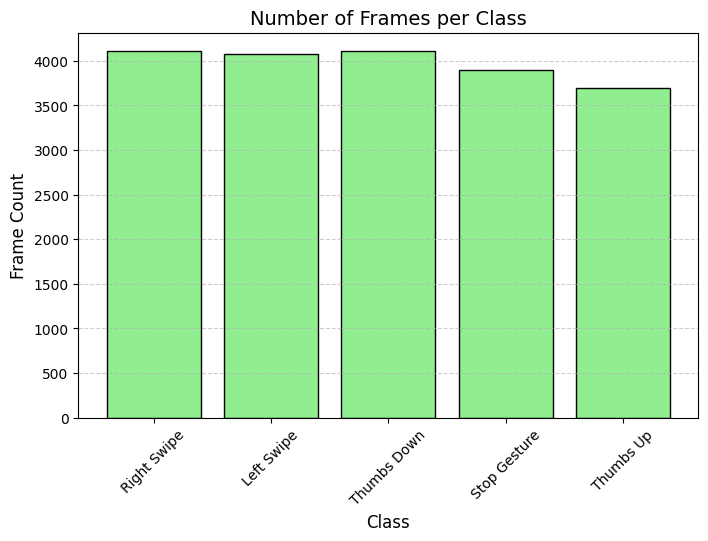

In [3]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt


# شمارش فولدر و فریم‌ها
folder_counts = defaultdict(int)
frame_counts = defaultdict(int)

for folder in os.listdir(train):
    folder_path = os.path.join(train, folder)
    if os.path.isdir(folder_path):
        for main_class, patterns in class_patterns.items():
            if any(pat in folder for pat in patterns):
                folder_counts[main_class] += 1
                # شمارش تعداد فریم‌ها (فایل‌های jpg/png)
                num_frames = len([
                    f for f in os.listdir(folder_path)
                    if f.lower().endswith(('.jpg', '.png'))
                ])
                frame_counts[main_class] += num_frames
                break


print("\n🖼 تعداد فریم‌های هر کلاس:")
for cls in class_patterns.keys():
    print(f"{cls}: {frame_counts[cls]} frames")

# رسم نمودار تعداد فریم‌ها
plt.figure(figsize=(8,5))
plt.bar(frame_counts.keys(), frame_counts.values(), color='lightgreen', edgecolor='black')
plt.title("Number of Frames per Class", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frame Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [17]:
!pip uninstall mediapipe -y
!pip install mediapipe==0.10.11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [5]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print("Num Gpu available:",len(tf.config.list_physical_devices('GPU')))

In [4]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


SEQUENCE_LENGTH = 30

# تعریف الگوها برای هر کلاس
class_patterns = {
    "Thumbs Up": ["Thumbs Up_new", "Thumbs_Up_new"],
    "Left Swipe": ["Left Swipe_new_Left Swipe_new", "Left_Swipe_new"],
    "Right Swipe": ["Right Swipe_new", "Right_Swipe_new"],
    "Stop Gesture": ["Stop_new", "Stop Gesture_new"],
    "Thumbs Down": ["Thumbs Down_new", "Thumbs_Down_new"]
}

class_names = list(class_patterns.keys())
NUM_CLASSES = len(class_names)
class_map = {name: idx for idx, name in enumerate(class_names)}

# ========================
# MediaPipe setup
# ========================
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7)

# ========================
# Helper function: extract landmarks
# ========================
def extract_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    if results.multi_hand_landmarks:
        lm_list = []
        hand_landmarks = results.multi_hand_landmarks[0]
        for lm in hand_landmarks.landmark:
            lm_list.extend([lm.x, lm.y, lm.z])
        return lm_list
    else:
        return [0]*63  # اگر دست پیدا نشد

def load_dataset(base_path):
    sequences = []
    labels = []

    for gesture_name, patterns in class_patterns.items():
        # پیدا کردن فولدرهای مربوط به کلاس
        gesture_folders = [f for f in os.listdir(base_path) if any(p in f for p in patterns)]
        for folder_name in gesture_folders:
            folder_path = os.path.join(base_path, folder_name)
            frames = sorted(os.listdir(folder_path))
            # Extract landmarks for each frame
            landmarks_seq = []
            for f in frames:
                img_path = os.path.join(folder_path, f)
                img = cv2.imread(img_path)
                landmarks = extract_landmarks(img)
                landmarks_seq.append(landmarks)
            for i in range(len(landmarks_seq) - SEQUENCE_LENGTH + 1):
                seq = landmarks_seq[i:i+SEQUENCE_LENGTH]
                sequences.append(seq)
                labels.append(class_map[gesture_name])
    return np.array(sequences), np.array(labels)


X_train, y_train = load_dataset(train)
X_val, y_val = load_dataset(val)

y_train_cat = to_categorical(y_train, num_classes=NUM_CLASSES)
y_val_cat = to_categorical(y_val, num_classes=NUM_CLASSES)

print(f"Train sequences: {X_train.shape}, Validation sequences: {X_val.shape}")

# ========================
# LSTM Model
# ========================
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(SEQUENCE_LENGTH, 63)))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Train sequences: (663, 30, 63), Validation sequences: (100, 30, 63)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,277 (274.52 KB)

 Trainable params: 70,277 (274.52 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val_cat)
)
model.save("gesture_lstm_model.h5")
hands.close()

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.2589 - loss: 1.5913 - val_accuracy: 0.5900 - val_loss: 1.2407
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6188 - loss: 1.1196 - val_accuracy: 0.7500 - val_loss: 0.6467
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7793 - loss: 0.6488 - val_accuracy: 0.9000 - val_loss: 0.4375
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8544 - loss: 0.4345 - val_accuracy: 0.9400 - val_loss: 0.2043
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9264 - loss: 0.2372 - val_accuracy: 0.9500 - val_loss: 0.1541
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9399 - loss: 0.1724 - val_accuracy: 0.9400 - val_loss: 0.1710
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9002 - loss: 0.2646 - val_accuracy: 0.9300 - val_loss: 0.1377
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9335 - loss: 0.2027 - val_accuracy: 0.9600 - v

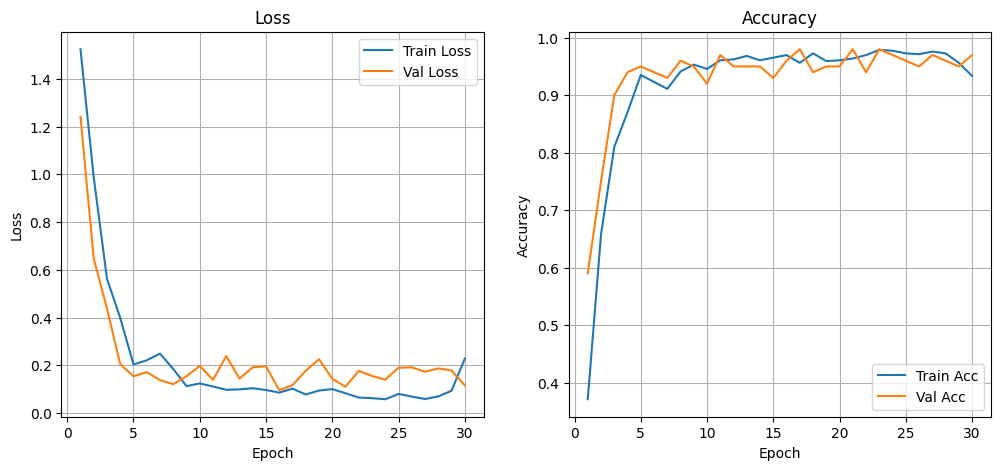

In [6]:
plt.figure(figsize=(12,5))
epochs=range(1,31)
plt.subplot(1,2,1)
plt.plot(epochs,history.history['loss'], label='Train Loss')
plt.plot(epochs,history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,history.history['accuracy'], label='Train Acc')
plt.plot(epochs,history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install pyautogui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautogui: filename=pyautogui-0.9.54-py3-none-any.whl size=37684 sha256=90cdb0e9b14b3eb5ea92b80d7fc20593c8225f8743bda00846a7101b

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

save_path = '/content/drive/MyDrive/gesture_lstm_model.h5'

model.save(save_path)

print("Model saved to Google Drive at:", save_path)


Model saved to Google Drive at: /content/drive/MyDrive/gesture_lstm_model.h5


1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 888ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
              precision    recall  f1-score   support

   Thumbs Up       0.94      1.00      0.97        16
  Left Swipe       0.94      0.94      0.94        18
 Right Swipe       1.00      0.96      0.98        23
Stop Gesture       0.96      1.00      0.98        22
 Thumbs Down       1.00      0.95      0.98        21

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



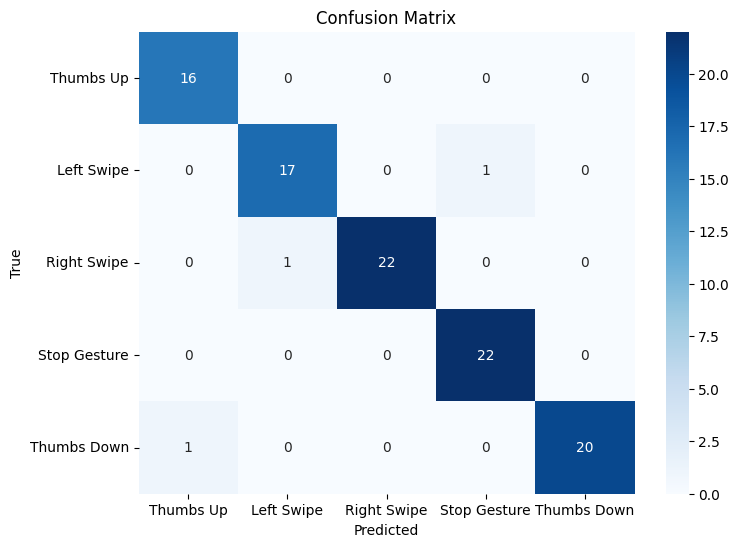

In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# 1. بارگذاری مدل
# ========================
model_path = "/content/drive/MyDrive/gesture_lstm_model.h5"
model = load_model(model_path)

# ========================
# 2. بارگذاری داده تست
# ========================
# فرض: X_test شکلش (تعداد نمونه‌ها، sequence_length, feature_dim) هست
#       y_test شکلش one-hot (تعداد نمونه‌ها، تعداد کلاس‌ها) هست
X_test = X_val
y_test = y_val_cat

# تبدیل y_test به label عددی
y_test_labels = np.argmax(y_test, axis=1)

# ========================
# 3. گرفتن prediction
# ========================
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# ========================
# 4. گزارش عملکرد
# ========================
class_names = ["Thumbs Up", "Left Swipe", "Right Swipe", "Stop Gesture", "Thumbs Down"]

print(classification_report(y_test_labels, y_pred, target_names=class_names))

# ========================
# 5. رسم confusion matrix
# ========================
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
